This project is to predict if a company will be under a financial distress in the future. The dataset was obtained from Kaggle dataset (https://www.kaggle.com/shebrahimi/financial-distress). Please see the page for the detailed description of the data.

The stakeholder's requirement is to predict categorically (financially health/financially distressed), however, this categorical prediction is derived from a numerical data: if the variable "Financial Distress" is above -0.5, the company is considered healthy. Otherwise, it is considered distressed.

In this project, I decided to use regression models to predict the "Financial Distress" value, which then will be converted to the "Health/Distressed" scale.

Notes on raw data:

The columns have arbitrary names (x1, x2, x3 ... x83) as provided, so I have no way of knowing or guessing what each columns represent.

Column 0: Company ID number
Column 1: Represents a different time the data belongs to.
Column 82: This data (x80) is categorical according to the data provider.
    
The above-mentioned columns will be removed during the analysis, as these data will adversely affect the prediction.

In [2]:
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [3]:
%matplotlib inline
pd.set_option('display.max_rows', 50) # set the max_rows to a desired number to see all column properties
pd.set_option('display.max_columns', None) # set this to None to display all columns
figsize = [[],[]]
figsize[0] = 24
figsize[1] = 36
plt.rcParams['figure.figsize'] = figsize

In [4]:
filename = '../FinancialDistress.csv'
dataset_raw = read_csv(filename)
names = list(dataset_raw.columns.values)
print(dataset_raw.head())
dataset_raw.shape

   Company  Time  Financial Distress      x1        x2       x3       x4  \
0        1     1            0.010636  1.2810  0.022934  0.87454  1.21640   
1        1     2           -0.455970  1.2700  0.006454  0.82067  1.00490   
2        1     3           -0.325390  1.0529 -0.059379  0.92242  0.72926   
3        1     4           -0.566570  1.1131 -0.015229  0.85888  0.80974   
4        2     1            1.357300  1.0623  0.107020  0.81460  0.83593   

         x5        x6       x7        x8        x9       x10      x11  \
0  0.060940  0.188270  0.52510  0.018854  0.182790  0.006449  0.85822   
1 -0.014080  0.181040  0.62288  0.006423  0.035991  0.001795  0.85152   
2  0.020476  0.044865  0.43292 -0.081423 -0.765400 -0.054324  0.89314   
3  0.076037  0.091033  0.67546 -0.018807 -0.107910 -0.065316  0.89581   
4  0.199960  0.047800  0.74200  0.128030  0.577250  0.094075  0.81549   

       x12       x13      x14     x15       x16     x17       x18       x19  \
0  2.00580  0.125460   6.

(3672, 86)

In [5]:
# Removing columns that will not help the model's accuracy
DropColumns = ['Company', 'Time', 'x80']
dataset = dataset_raw.copy()
dataset.drop(DropColumns, axis=1, inplace=True)
print(dataset.head(10))
print(dataset.shape)

   Financial Distress       x1        x2       x3       x4        x5  \
0            0.010636  1.28100  0.022934  0.87454  1.21640  0.060940   
1           -0.455970  1.27000  0.006454  0.82067  1.00490 -0.014080   
2           -0.325390  1.05290 -0.059379  0.92242  0.72926  0.020476   
3           -0.566570  1.11310 -0.015229  0.85888  0.80974  0.076037   
4            1.357300  1.06230  0.107020  0.81460  0.83593  0.199960   
5            0.007188  1.05580  0.081916  0.87949  0.68673  0.142630   
6            1.200200  0.97059  0.076064  0.90677  0.80980  0.165920   
7            2.234800  1.05900  0.130200  0.81811  0.87599  0.234450   
8            1.340500  1.12450  0.147840  0.75871  1.07990  0.276440   
9            2.047400  1.59980  0.262460  0.54615  1.31270  0.369480   

         x6       x7        x8        x9       x10      x11       x12  \
0  0.188270  0.52510  0.018854  0.182790  0.006449  0.85822   2.00580   
1  0.181040  0.62288  0.006423  0.035991  0.001795  0.85152  

In [6]:
# Checking data types
dataset.dtypes

Financial Distress    float64
x1                    float64
x2                    float64
x3                    float64
x4                    float64
x5                    float64
x6                    float64
x7                    float64
x8                    float64
x9                    float64
x10                   float64
x11                   float64
x12                   float64
x13                   float64
x14                   float64
x15                   float64
x16                   float64
x17                   float64
x18                   float64
x19                   float64
x20                   float64
x21                   float64
x22                   float64
x23                   float64
x24                   float64
                       ...   
x58                   float64
x59                   float64
x60                   float64
x61                   float64
x62                   float64
x63                   float64
x64                   float64
x65       

In [7]:
# Checking the general summary of each columns
print(dataset.describe())

       Financial Distress           x1           x2           x3  \
count         3672.000000  3672.000000  3672.000000  3672.000000   
mean             1.040257     1.387820     0.129706     0.615769   
std              2.652227     1.452926     0.120013     0.177904   
min             -8.631700     0.075170    -0.258080     0.016135   
25%              0.172275     0.952145     0.048701     0.501888   
50%              0.583805     1.183600     0.107530     0.638690   
75%              1.351750     1.506475     0.188685     0.749425   
max            128.400000    51.954000     0.749410     0.967900   

                 x4           x5           x6           x7             x8  \
count  3.672000e+03  3672.000000  3672.000000  3672.000000    3672.000000   
mean   8.681599e-01     0.154949     0.106717     0.784031      39.274361   
std    5.719519e-01     0.124904     0.210555     1.033606    4305.688039   
min    5.350000e-07    -0.269790    -0.627750     0.035160 -145000.000000   
25

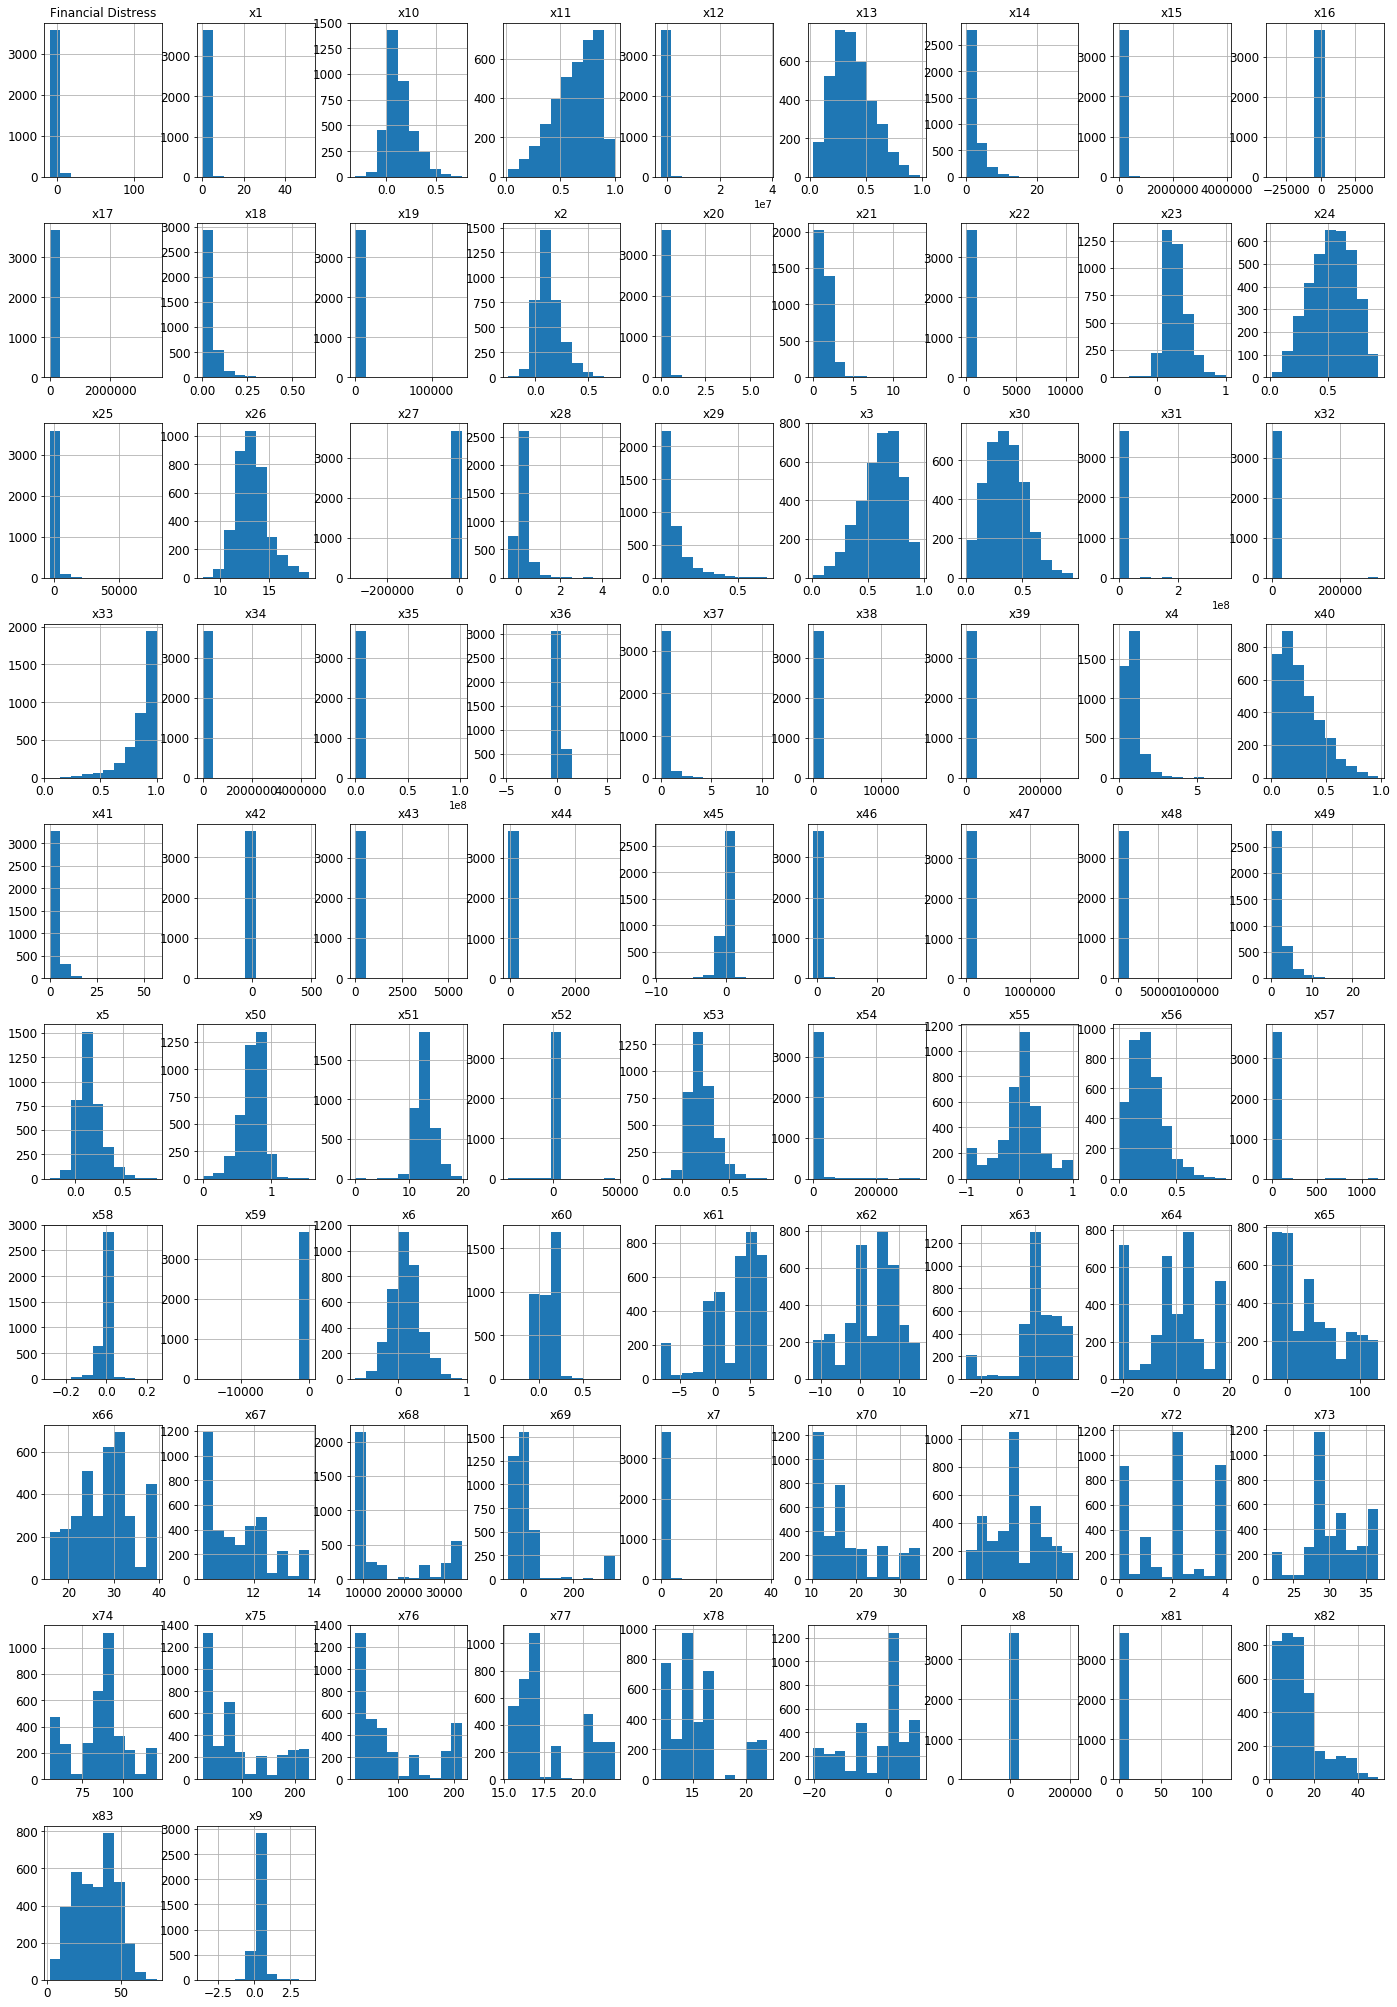

In [8]:
# Visualizing the data distribution
figsize[0] = 24
figsize[1] = 36
plt.rcParams['figure.figsize'] = figsize
dataset.hist(sharex=False, sharey=False, xlabelsize=12, ylabelsize=12)
plt.show()

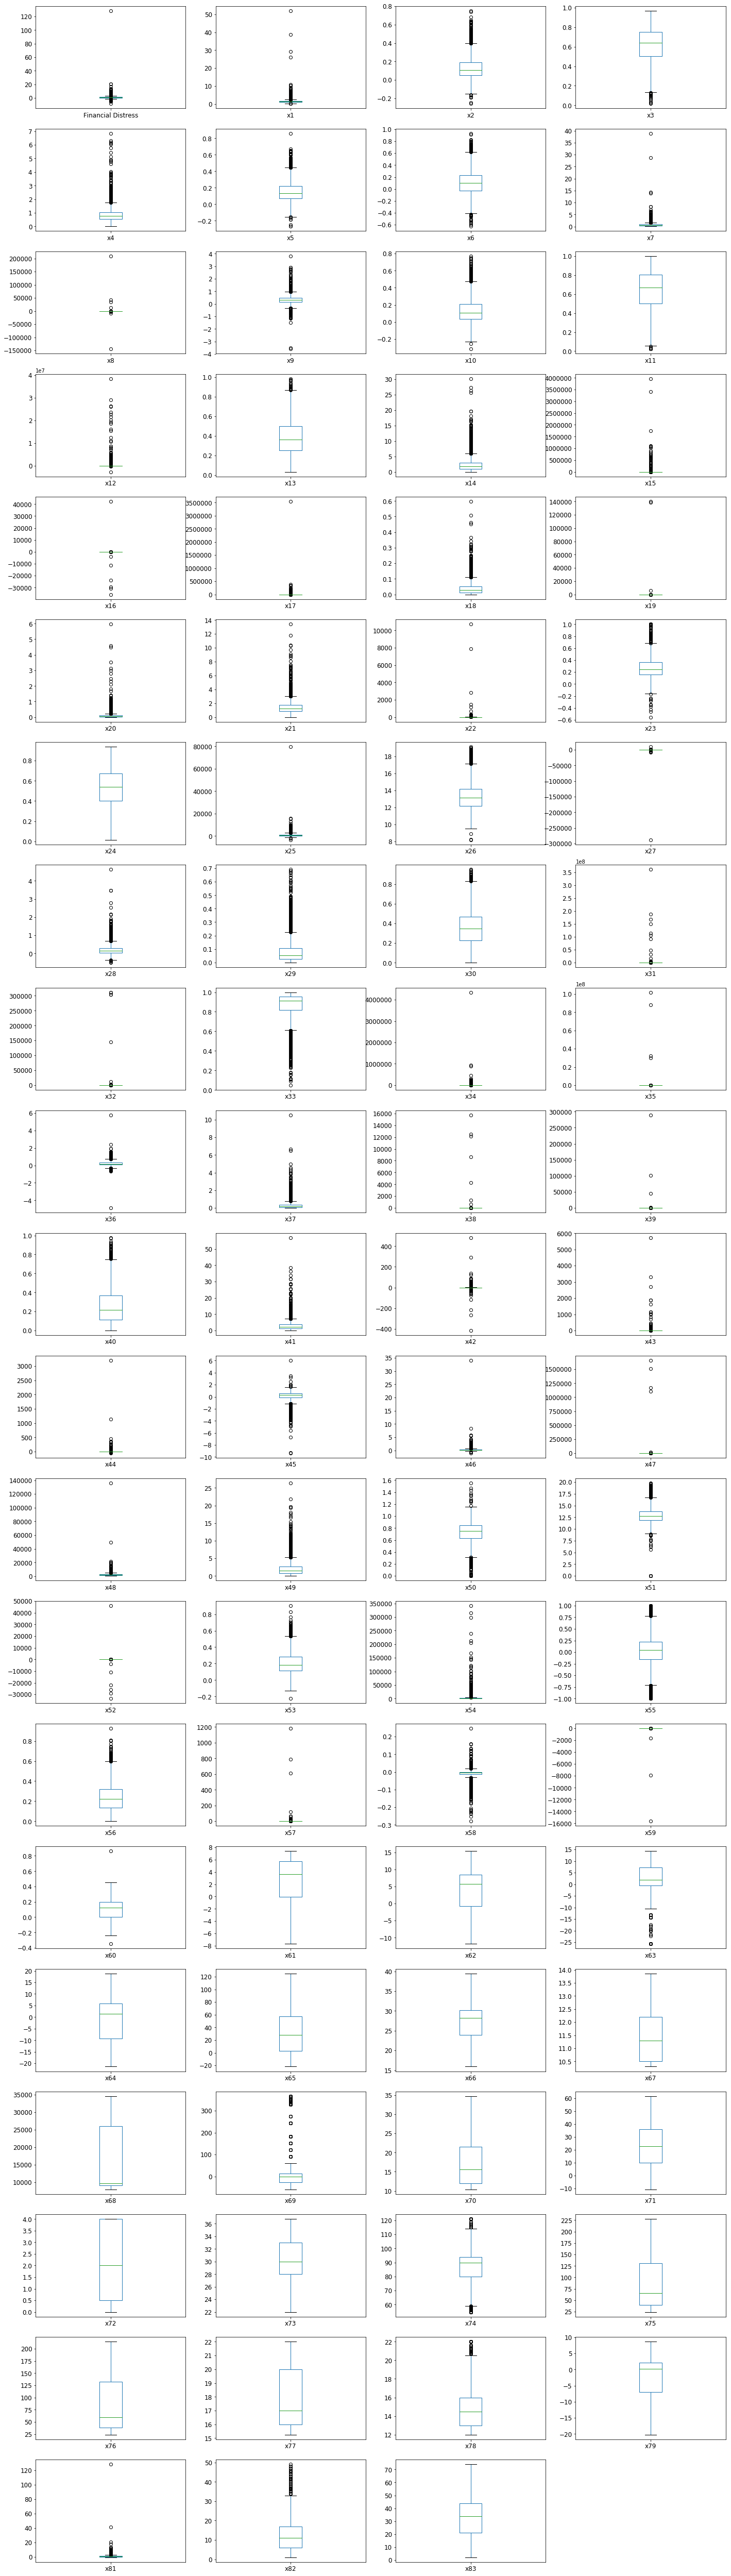

In [9]:
# Another data distribution visualization
dataset.plot(kind='box', subplots=True, layout=(23,4), sharex=False, sharey=False, fontsize=12)
plt.show()

The target (Financial Distress) has one outlier. It will be interesting to compare the models if the outlier is included in or excluded from the training set.

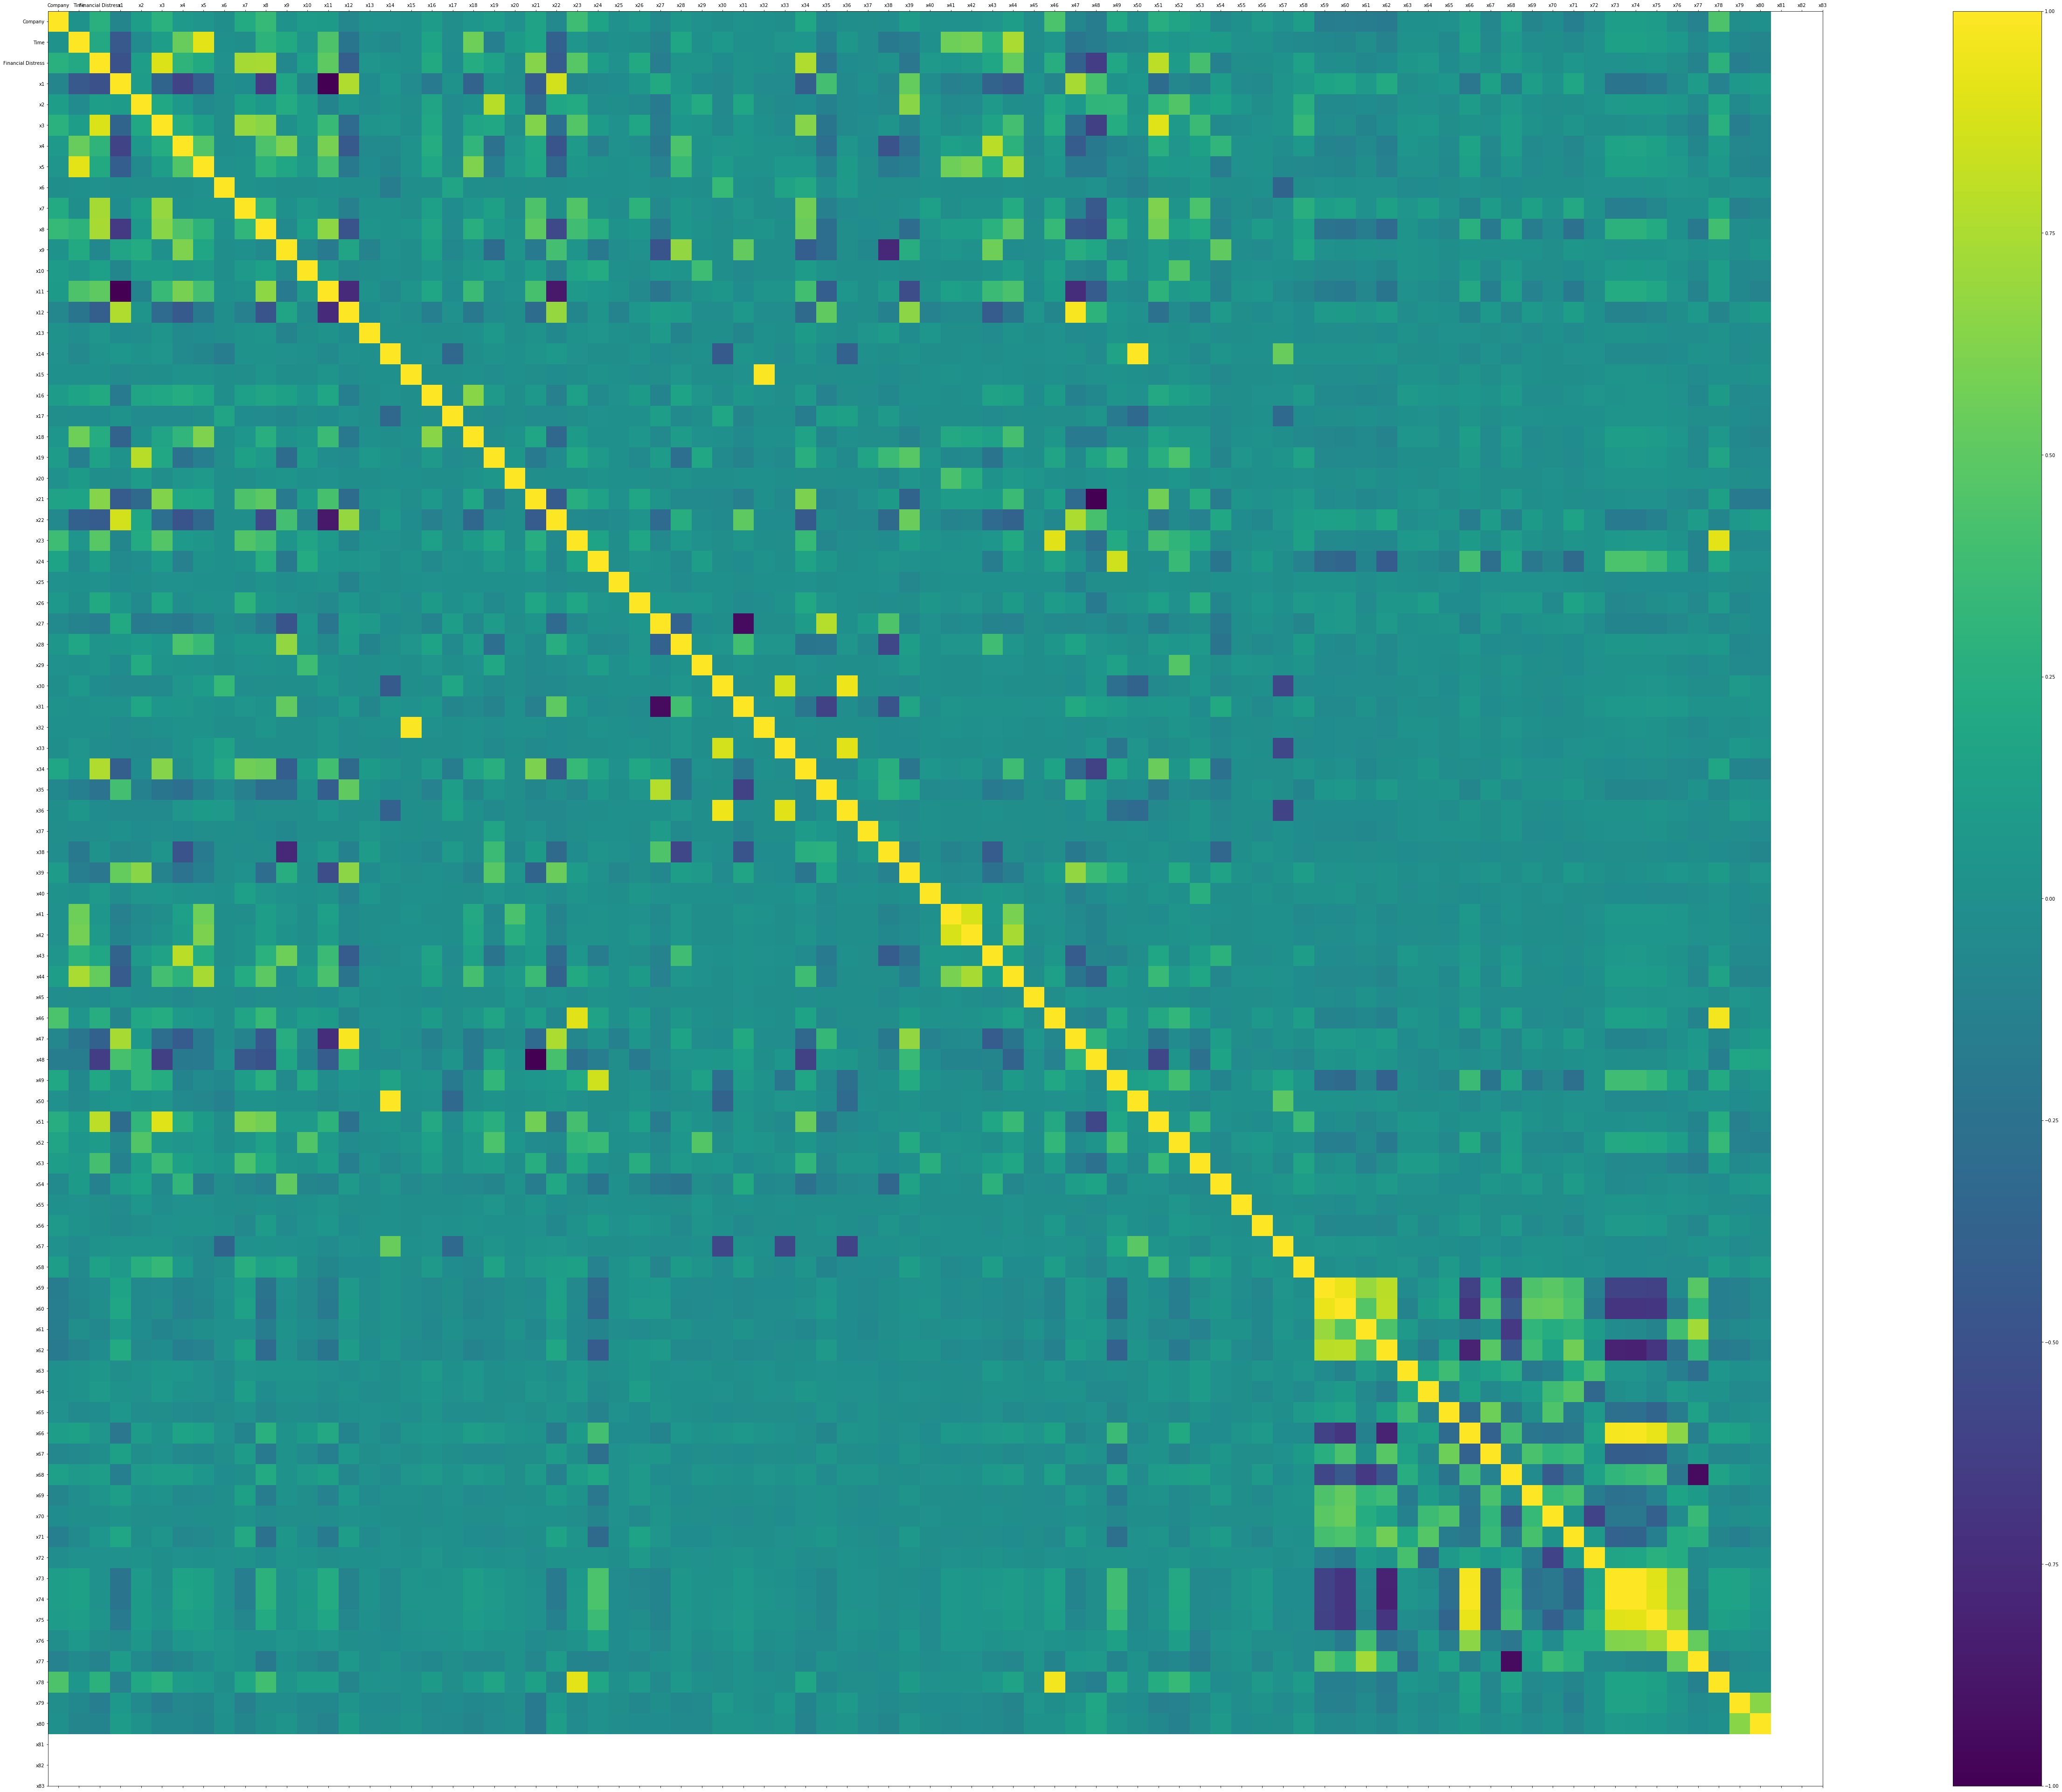

In [10]:
# Visualizing the correlations
figsize[0] = 100
figsize[1] = 70
plt.rcParams['figure.figsize'] = figsize
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,86,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [9]:
# Splitting the dataset into validation set (30% [a requirement by the stakeholder]
array = dataset.values
X = array[:, 1:82]
Y = array[:, 0]
validation_size = 0.30
seed = 3
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [10]:
num_folds = 10
scoring = 'neg_mean_squared_error'

In [11]:
# Initial test to identify high performing algorithms
models = []
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [14]:
InitialResults = []
InitialNames = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    InitialResults.append(cv_results)
    InitialNames.append(name)
    message = '{0}: {1} ({2})'.format(name, cv_results.mean(), cv_results.std())
    print(message)

D:\Anaconda2_5_Python2_7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LASSO: -1.66751081142 (0.495198973976)
EN: -1.66022726931 (0.501345619993)
KNN: -1.75718650254 (0.544106880085)
CART: -2.94603014949 (1.1399490512)
SVR: -2.82339485597 (0.694716813613)


I get convergence problems, most likely due to the unscaled data. Will scale the data to see how much improvements I can get.

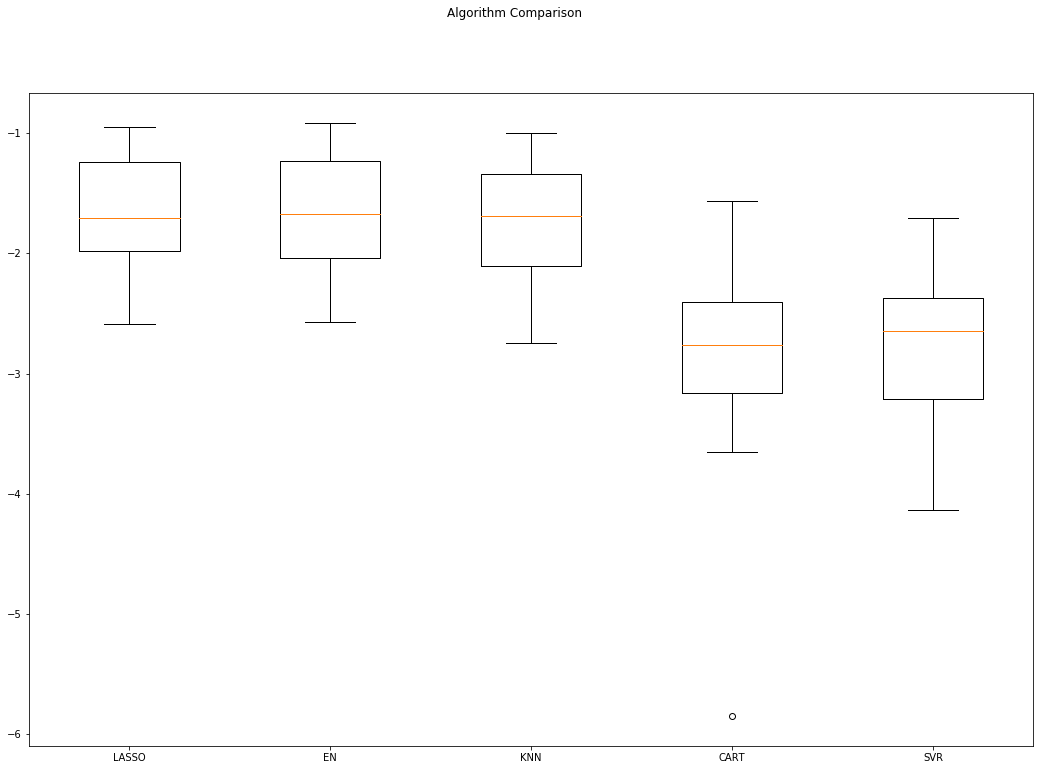

In [15]:
# Visualizing the results
figsize[0] = 18
figsize[1] = 12
plt.rcParams['figure.figsize'] = figsize
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(InitialResults)
ax.set_xticklabels(InitialNames)
plt.show()

In [16]:
# Standardizing the data
pipelines = []
# pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('CART', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('ScaledCART', StandardScaler()), ('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()), ('SVR', SVR())])))
ScaledResults = []
ScaledNames = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    ScaledResults.append(cv_results)
    ScaledNames.append(name)
    message = '{0}: {1} ({2})'.format(name, cv_results.mean(), cv_results.std())
    print(message)

ScaledLASSO: -2.5089519217 (0.670830366276)
ScaledEN: -1.89617476631 (0.572375735565)
ScaledKNN: -1.61707840886 (0.621153633389)
ScaledCART: -2.95173823093 (1.31226125646)
ScaledSVR: -1.45432564638 (0.591207516846)


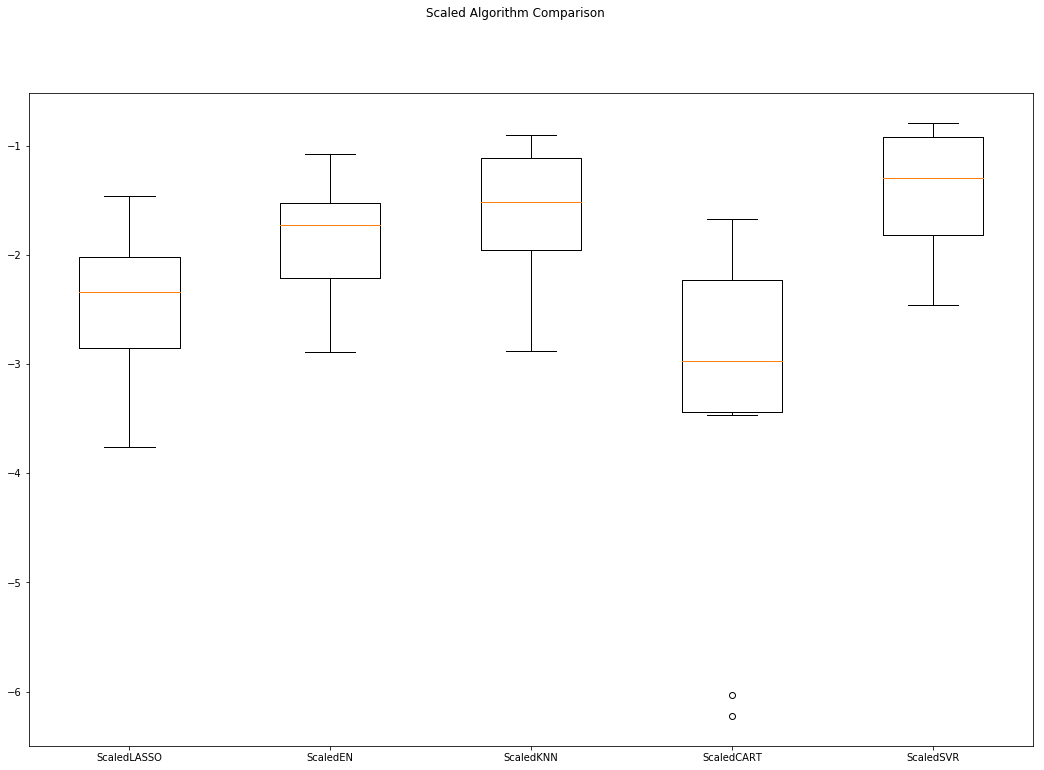

In [21]:
# Visualizing the results from the standardized dataset
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(ScaledResults)
ax.set_xticklabels(ScaledNames)
plt.show()

In [17]:
# Ensemble methods
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesRegressor())])))

EnsemblesResults = []
EnsemblesNames = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    EnsemblesResults.append(cv_results)
    EnsemblesNames.append(name)
    message = '{0}: {1} ({2})'.format(name, cv_results.mean(), cv_results.std())
    print(message)

ScaledAB: -1.67699002577 (0.643104606947)
ScaledGBM: -1.51495314063 (0.520324444254)
ScaledRF: -1.65698020588 (0.548433728383)
ScaledET: -1.48653693619 (0.565184975648)


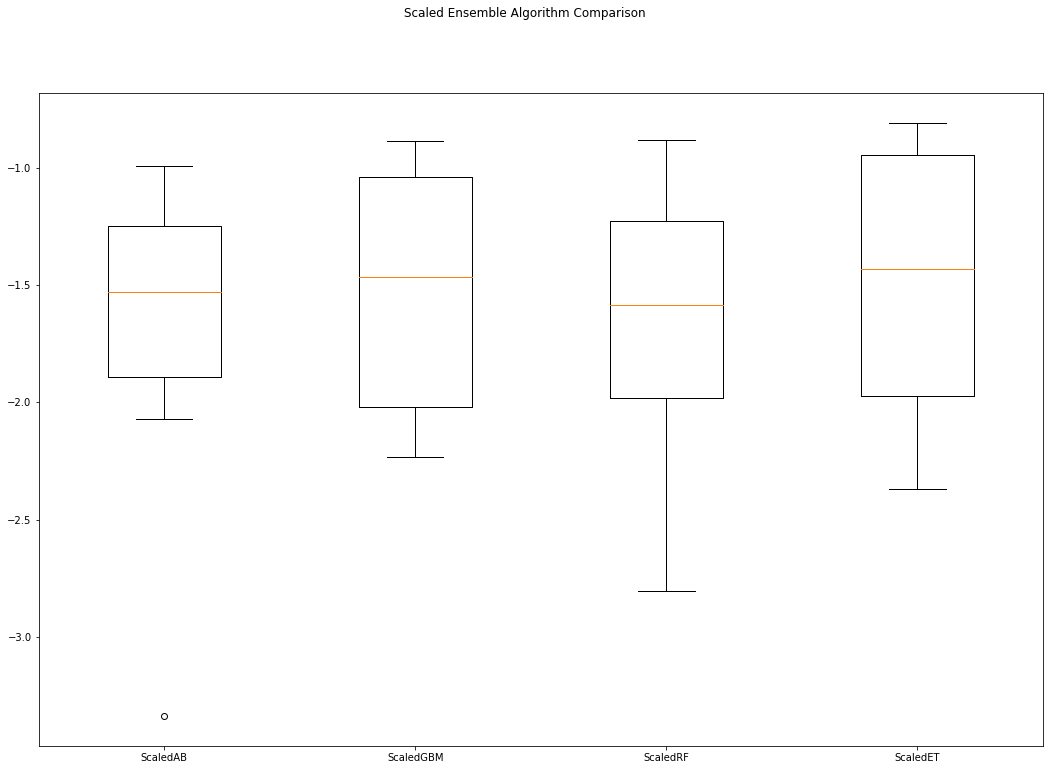

In [18]:
# Visualize the results from the ensemble algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(EnsemblesResults)
ax.set_xticklabels(EnsemblesNames)
plt.show()

In [13]:
# Scaling the data for optimization
scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)

Gradient boosting regressor outperformed others by a significant margin. Will optimize the parameters.

In [20]:
# Tuning parameters for GBR. Initially only one parameter will be optimized. The results from here will be used to narrow down the search space. 
model = GradientBoostingRegressor()
max_depth = [2, 4, 6, 8, 10, 15, 20, 30, 40, 50, 60, 70, 80]
min_samples_split = [2, 4, 6, 8, 10, 15, 20, 30, 40, 50, 60, 70, 80]
min_samples_leaf = [2, 4, 6, 8, 10, 15, 20, 30, 40, 50, 60, 70, 80]
max_leaf_nodes = [2, 4, 6, 8, 10, 15, 20, 30, 40, 50, 60, 70, 80]
param_grid = dict(max_depth = max_depth)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX_train, Y_train)
print('max_depth Best: {0} using {1}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with :{2}'.format(mean, stdev, param))
print('\n')
param_grid = dict(min_samples_split = min_samples_split)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX_train, Y_train)
print('min_samples_split Best: {0} using {1}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with :{2}'.format(mean, stdev, param))
print('\n')
param_grid = dict(min_samples_leaf = min_samples_leaf)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX_train, Y_train)
print('min_samples_leaf Best: {0} using {1}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with :{2}'.format(mean, stdev, param))
min_samples_leaf = min_samples_leaf
print('\n')
param_grid = dict(max_leaf_nodes = max_leaf_nodes)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX_train, Y_train)
print('max_leaf_nodes Best: {0} using {1}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with :{2}'.format(mean, stdev, param))
min_samples_leaf = min_samples_leaf

max_depth Best: -1.41365849335 using {'max_depth': 2}
-1.41365849335 (0.553085305635) with :{'max_depth': 2}
-1.65387847505 (0.542687117706) with :{'max_depth': 4}
-1.63501095968 (0.620120471486) with :{'max_depth': 6}
-1.71064687659 (0.727955548352) with :{'max_depth': 8}
-1.96079328674 (0.899861695019) with :{'max_depth': 10}
-2.40514706998 (1.16642876871) with :{'max_depth': 15}
-2.71934501514 (1.22824774987) with :{'max_depth': 20}
-2.7859360391 (1.20596769825) with :{'max_depth': 30}
-2.78351182553 (1.23821615868) with :{'max_depth': 40}
-2.81438049746 (1.28989907245) with :{'max_depth': 50}
-2.82165360381 (1.24337908631) with :{'max_depth': 60}
-2.80131293939 (1.20926645246) with :{'max_depth': 70}
-2.82876312398 (1.27143596677) with :{'max_depth': 80}


min_samples_split Best: -1.47046326721 using {'min_samples_split': 40}
-1.50939950138 (0.543098951178) with :{'min_samples_split': 2}
-1.47755194856 (0.534695812582) with :{'min_samples_split': 4}
-1.50953204207 (0.538102213237) 

In [21]:
# Multi-parameter grid search
max_depth = [2, 4, 6, 8, 10]
min_samples_leaf = [20, 30, 40, 50, 60]
max_leaf_nodes = [2, 4, 6, 8, 10]
param_grid = dict(max_depth = max_depth, min_samples_leaf = min_samples_leaf, max_leaf_nodes = max_leaf_nodes)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX_train, Y_train)
print('Best: {0} using {1}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with :{2}'.format(mean, stdev, param))

Best: -1.30960558043 using {'max_leaf_nodes': 8, 'max_depth': 4, 'min_samples_leaf': 40}
-1.38183602187 (0.52703664633) with :{'max_leaf_nodes': 2, 'max_depth': 2, 'min_samples_leaf': 20}
-1.37762416747 (0.534536585802) with :{'max_leaf_nodes': 2, 'max_depth': 2, 'min_samples_leaf': 30}
-1.36323481191 (0.528250622579) with :{'max_leaf_nodes': 2, 'max_depth': 2, 'min_samples_leaf': 40}
-1.37325514156 (0.525281345915) with :{'max_leaf_nodes': 2, 'max_depth': 2, 'min_samples_leaf': 50}
-1.40765659762 (0.548771999162) with :{'max_leaf_nodes': 2, 'max_depth': 2, 'min_samples_leaf': 60}
-1.36868782556 (0.505695605828) with :{'max_leaf_nodes': 4, 'max_depth': 2, 'min_samples_leaf': 20}
-1.34703656083 (0.525781738524) with :{'max_leaf_nodes': 4, 'max_depth': 2, 'min_samples_leaf': 30}
-1.31934729494 (0.509222698106) with :{'max_leaf_nodes': 4, 'max_depth': 2, 'min_samples_leaf': 40}
-1.32975749129 (0.510406227757) with :{'max_leaf_nodes': 4, 'max_depth': 2, 'min_samples_leaf': 50}
-1.347479962

In [14]:
# Finalizing the model
model = GradientBoostingRegressor(min_samples_split=8, max_depth=4, min_samples_leaf=40)
model.fit(rescaledX_train, Y_train)

# ... and see how the model performs against the validation set
rescaledX_validation = scaler.transform(X_validation)

Predictions = model.predict(rescaledX_validation)

print(mean_squared_error(Y_validation, Predictions))


14.2100896101


The error from the validation is considerably worse... The model needs a significant improvement.

In [21]:
# Converting the Financial Distress values to a "Healthy/Distressed" results
FinalPredictions = []
Validations = []
for i in Predictions:
    if i > -0.5:
        FinalPredictions.append(0)
    else:
        FinalPredictions.append(1)
for i in Y_validation:
    if i > -0.5:
        Validations.append(0)
    else:
        Validations.append(1)

In [37]:
# Analyzing the performance of the model using a confusion matrix
y_true = pd.Series(Validations)
y_prediction = pd.Series(FinalPredictions)
crsTab = pd.crosstab(y_true, y_prediction, rownames=['True'], colnames=['Predicted'], margins=True)
print(crsTab)

Predicted     0   1   All
True                     
0          1048  26  1074
1            18  10    28
All        1066  36  1102


Predictions for the financially distressed companies are not good. This is most-likely due to the unbalanced data. Potential solutions are to use different performance measurement (Precision, Recall, F-score, Kappa, etc.), and/or to resample the dataset to balance (sampling with replacements). Will try resampling to balance the dataset in the future.